## Testing Different Distributions

In [1]:
import matplotlib.pyplot as plt
import random
import algorithms 
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

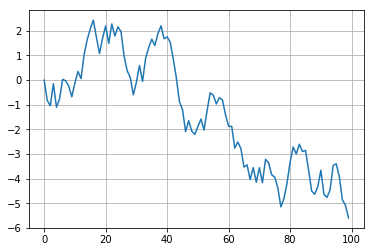

In [4]:
length = 100
uniform_walk = algorithms.create_uniform_random_walk(length)

plt.plot([i for i in range(0,length)], uniform_walk)
plt.grid()
plt.show()

## Working with the Data
Read from the csv file to get the most current data.

[1000000 2000000 3000000]


(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.28125  , 0.2828125, 0.284375 , 0.2859375, 0.2875   , 0.2890625,
        0.290625 , 0.2921875, 0.29375  , 0.2953125, 0.296875 ]),
 <a list of 10 Patch objects>)

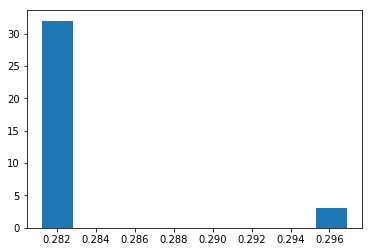

In [3]:
data = pd.read_csv('data.csv')
print(data['size'].unique())
data.head(5)
randomized_300000 = data[(data['size']==1_000_000) & (data['original_sorting']=='normal(0,1)')]
plt.hist(x=randomized_300000['time'], bins=10)

## Analysis of Variance

In [9]:
sorting_time_lm = ols('time ~ C(original_sorting)+C(size)',
                 data=data).fit()
print(sorting_time_lm.summary())
table = sm.stats.anova_lm(sorting_time_lm, typ=2) # Type 2 ANOVA DataFrame
table

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     451.4
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          4.30e-202
Time:                        15:40:28   Log-Likelihood:                 166.92
No. Observations:                 525   AIC:                            -319.8
Df Residuals:                     518   BIC:                            -290.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

,sum_sq,df,F,PR(>F)
C(original_sorting),59.319638,4.0,472.008583,3.667549e-171
C(size),25.773903,2.0,410.167830,1.702393e-107
Residual,16.274901,518.0,NaN,NaN


(array([5.800e+02, 1.220e+03, 1.368e+03, 1.344e+03, 1.154e+03, 9.990e+02,
        7.540e+02, 6.580e+02, 5.000e+02, 3.630e+02, 2.590e+02, 1.940e+02,
        1.530e+02, 1.100e+02, 9.500e+01, 7.400e+01, 5.000e+01, 3.500e+01,
        2.500e+01, 2.200e+01, 1.500e+01, 7.000e+00, 6.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([7.86743243e-03, 3.90263533e-01, 7.72659633e-01, 1.15505573e+00,
        1.53745183e+00, 1.91984793e+00, 2.30224403e+00, 2.68464013e+00,
        3.06703623e+00, 3.44943233e+00, 3.83182843e+00, 4.21422453e+00,
        4.59662063e+00, 4.97901673e+00, 5.36141284e+00, 5.74380894e+00,
        6.12620504e+00, 6.50860114e+00, 6.89099724e+00, 7.27339334e+00,
        7.65578944e+00, 8.03818554e+00, 8.42058164e+00, 8.80297774e+00,
        9.18537384e+00, 9.56776994e+00, 9.95016604e+00, 1.03325621e+01,
        1.07149582e+01, 1.10973543e+01, 1.14797504e+01]),
 <a list of 30 Patch objects>)

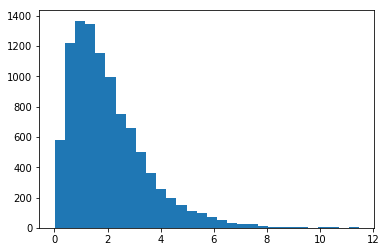

In [11]:
mu = 2
sigma = 1
samples = 10_000
data = [random.gammavariate(mu, sigma) for i in range(0,samples)]
plt.hist(x=data, bins=30)